In [ ]:
from importlib.resources import path
from tabnanny import verbose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import OneHotEncoder      
from statistics import mean
from sklearn.model_selection import KFold   
import joblib 

In [81]:
path = 'C:/Users/hp/Downloads/HK2 21-22/Machine Learning/CodeEx/code_week4/'
def ReadData(path):
    return pd.read_excel(path)

raw_data = ReadData(path + '/datasets/final_dataset_new.xlsx')


In [82]:
def Watch_Info_Data(raw_data): 
    
    print('\n____________ Dataset info ____________')
    print(raw_data.info())              
    print('\n____________ Some first data examples ____________')
    print(raw_data.head(10)) 
    
    print('\n____________ Counts on a feature ____________')
    league = raw_data['League'].value_counts()
    club = raw_data['Club'].value_counts()

    print(league) 
    print(club) 

    
    print('\n____________ Statistics of numeric features ____________')
    describe = raw_data.describe()
    print(describe)    
    
    print('\n____________ Get specific rows and cols ____________')     
    print(raw_data.loc[[0,5,20], ['Player', 'Value', 'Gls','League']] ) # Refer using column name
    print(raw_data.iloc[[0,5,20], [2, 8]] ) # Refer using column ID
Watch_Info_Data(raw_data)


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               1000 non-null   object 
 1   Club                 1000 non-null   object 
 2   Age                  1000 non-null   int64  
 3   Position             1000 non-null   object 
 4   Value                1000 non-null   int64  
 5   Value Player         1000 non-null   int64  
 6   Contract Years Left  997 non-null    float64
 7   League               1000 non-null   object 
 8   MP                   982 non-null    float64
 9   Total Mins/90        982 non-null    float64
 10  Gls                  982 non-null    float64
 11  Ast                  982 non-null    float64
 12  (G+A)/90             982 non-null    float64
dtypes: float64(6), int64(3), object(4)
memory usage: 101.7+ KB
None

____________ Some first data examp

In [89]:
# 3.2 Scatter plot b/w 2 features
def Show_Data_OneChart_Scatter(raw_data, x, y):
    raw_data.plot(kind="scatter", y=y, x=x, alpha=0.2)
    #plt.axis([0, 5, 0, 10000])
    plt.savefig(path +'/figures/scatter_1_feat.png', format='png', dpi=300)
    plt.show()      

def Show_Data_ManyCharts_Fix(raw_data, features):
    # 3.3 Scatter plot b/w every pair of features
    from pandas.plotting import scatter_matrix   
    features_to_plot = features
    scatter_matrix(raw_data[features_to_plot], figsize=(12, 8)) # Note: histograms on the main diagonal
    plt.savefig(path +'/figures/scatter_mat_all_feat.png', format='png', dpi=300)
    plt.show()

def Show_Data_Histogram(raw_data, features):
    # 3.4 Plot histogram of 1 feature
    from pandas.plotting import scatter_matrix   
    features_to_plot = features
    scatter_matrix(raw_data[features_to_plot], figsize=(12, 8)) # Note: histograms on the main diagonal
    plt.show()

    # 3.5 Plot histogram of numeric features
    #raw_data.hist(bins=10, figsize=(10,5)) #bins: no. of intervals
    raw_data.hist(figsize=(12,8)) #bins: no. of intervals
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10
    plt.tight_layout()
    plt.savefig(path+ '/figures/hist_raw_data.png', format='png', dpi=300) # must save before show()
    plt.show()
    
corr_matrix = []
 # 3.6 Compute correlations b/w features
def Correlations_Feature(raw_data, index):
    corr_matrix = raw_data.corr()
    print(corr_matrix) # print correlation matrix
    print('\n',corr_matrix[index].sort_values(ascending=False)) # print correlation b/w a feature and other features

# 3.7 Try combining features

def Correlations_Combine_Feature(raw_data):
    raw_data["Value By Season"] = raw_data["Value"] / raw_data["Contract Years Left"] 
    raw_data["Gls Ast"] = raw_data["Gls"] + raw_data["Ast"] 
    corr_matrix = raw_data.corr()
    print(corr_matrix["Value By Season"].sort_values(ascending=False)) # print correlation b/w a feature and other features
    raw_data.drop(columns = ["Value By Season", "Gls Ast"], inplace=True) # remove experiment columns
    #endregion
    

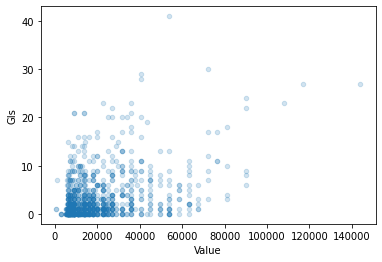

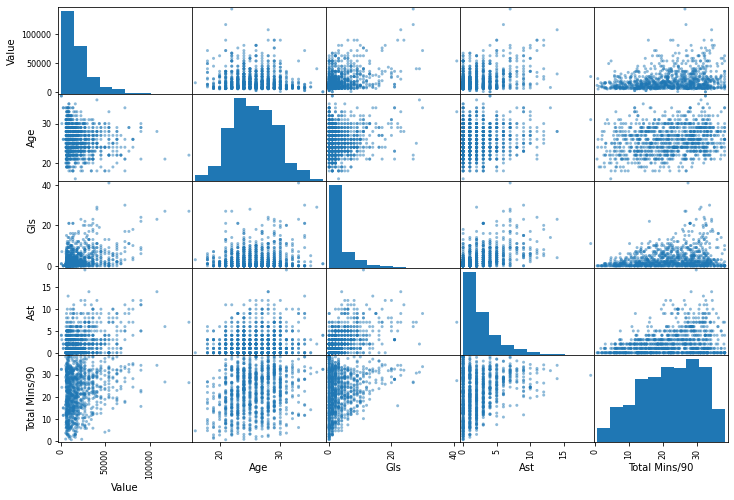

In [90]:
Show_Data_OneChart_Scatter(raw_data, "Value", "Gls")
feature = ["Value", "Age", "Gls", "Ast", "Total Mins/90"]
Show_Data_ManyCharts_Fix(raw_data, feature)

In [91]:
raw_data["Value By Season"] = raw_data["Value"] / raw_data["Contract Years Left"] 
raw_data["Gls Ast"] = raw_data["Gls"] + raw_data["Ast"] 
corr_matrix = raw_data.corr()
print(corr_matrix["Value By Season"].sort_values(ascending=False)) # print correlation b/w a feature and other features
raw_data.drop(columns = ["Value By Season", "Gls Ast"], inplace=True) # remove experiment columns

Value By Season        1.000000
Value Player           0.716962
Value                  0.716962
Gls Ast                0.355080
Gls                    0.323878
(G+A)/90               0.304429
Ast                    0.294686
Total Mins/90          0.139857
MP                     0.123357
Age                    0.023647
Contract Years Left   -0.375556
Name: Value By Season, dtype: float64


In [92]:
raw_data.drop(columns = ["Player", "Value Player", "Age"], inplace=True) 

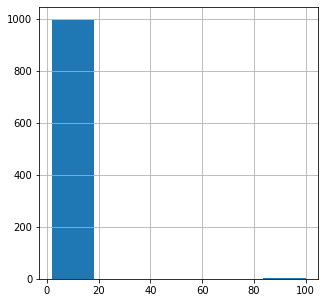

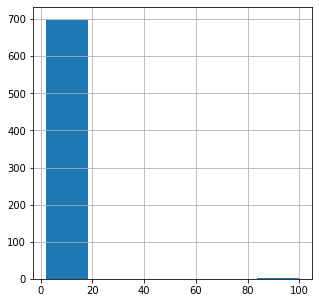

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 439 to 728
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Club                 700 non-null    object  
 1   Position             700 non-null    object  
 2   Value                700 non-null    int64   
 3   Contract Years Left  699 non-null    float64 
 4   League               700 non-null    object  
 5   MP                   687 non-null    float64 
 6   Total Mins/90        687 non-null    float64 
 7   Gls                  687 non-null    float64 
 8   Ast                  687 non-null    float64 
 9   (G+A)/90             687 non-null    float64 
 10  Interval Value       700 non-null    category
dtypes: category(1), float64(6), int64(1), object(3)
memory usage: 61.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 439 to 728
Data columns (total 10 columns):
 #   Column               Non-Null Count  

In [93]:
method = 2
if method == 1: # Method 1: Randomly select 20% of data for test set. Used when data set is large
    from sklearn.model_selection import train_test_split
    train_set, test_set = train_test_split(raw_data, test_size=0.2, random_state=42) # set random_state to get the same training set all the time, 
                                                                                     # otherwise, when repeating training many times, your model may see all the data
elif method == 2: # Method 2: Stratified sampling, to remain distributions of important features, see (Geron, 2019) page 56
    # Create new feature "KHOẢNG GIÁ": the distribution we want to remain
    raw_data["Interval Value"] = pd.cut(raw_data["Value"],
        bins=[0, 20000, 40000, 60000, 80000, 100000, np.inf],
        #labels=["<20 tr", "20-40 tr", "40-60 tr", "60-80 tr", "80-100 tr", ">100 tr"])
        labels=[2,4,6,8,10, 100]) # use numeric labels to plot histogram
    
    # Create training and test set
    from sklearn.model_selection import StratifiedShuffleSplit  
    splitter = StratifiedShuffleSplit(n_splits=4, test_size=0.3, random_state=42) # n_splits: no. of re-shuffling & splitting = no. of train-test sets 
                                                                                  # (if you want to run the algorithm n_splits times with different train-test set)
    for train_index, test_index in splitter.split(raw_data, raw_data["Interval Value"]): # Feature "KHOẢNG GIÁ" must NOT contain NaN
        train_set = raw_data.loc[train_index]
        test_set = raw_data.loc[test_index]      
    
    # See if it worked as expected
    raw_data["Interval Value"].hist(bins=6, figsize=(5,5)); plt.show();
    train_set["Interval Value"].hist(bins=6, figsize=(5,5)); plt.show()

    # Remove the new feature
    print(train_set.info())
    for _set_ in (train_set, test_set):
        #_set_.drop("income_cat", axis=1, inplace=True) # axis=1: drop cols, axis=0: drop rows
        _set_.drop(columns="Interval Value", inplace=True) 
    print(train_set.info())
    print(test_set.info())
    

In [94]:
train_set_labels = train_set["Value"].copy()
train_set = train_set.drop(columns = "Value") 
test_set_labels = test_set["Value"].copy()
test_set = test_set.drop(columns = "Value") 

In [95]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names
    def fit(self, dataframe, labels=None):
        return self
    def transform(self, dataframe):
        return dataframe[self.feature_names].values         

num_feat_names = ["MP", "Total Mins/90", "Gls", "Ast", "(G+A)/90", "Contract Years Left"] # =list(train_set.select_dtypes(include=[np.number]))
cat_feat_names = ['Club', 'Position', "League"] # =list(train_set.select_dtypes(exclude=[np.number])) 

# 4.4.2 Pipeline for categorical features
cat_pipeline = Pipeline([
    ('selector', ColumnSelector(cat_feat_names)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy="constant", fill_value = "NO INFO", copy=True)), # complete missing values. copy=False: imputation will be done in-place 
    ('cat_encoder', OneHotEncoder()) # convert categorical data into one-hot vectors
    ])   



In [96]:
class MyFeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_Gls_Ast = True): # MUST NO *args or **kargs
        self.add_Gls_Ast = add_Gls_Ast
    def fit(self, feature_values, labels = None):
        return self  # nothing to do here
    def transform(self, feature_values, labels = None):
        if self.add_Gls_Ast:        
            gls_id, ast_id = 1, 2 # column indices in num_feat_names. can't use column names b/c the transformer SimpleImputer removed them
            # NOTE: a transformer in a pipeline ALWAYS return dataframe.values (ie., NO header and row index)
            
            Total = feature_values[:, gls_id] + feature_values[:, ast_id]
            feature_values = np.c_[feature_values, Total] #concatenate np arrays
        return feature_values


In [97]:
num_pipeline = Pipeline([
    ('selector', ColumnSelector(num_feat_names)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy="median", copy=True)), # copy=False: imputation will be done in-place 
    ('attribs_adder', MyFeatureAdder(add_Gls_Ast = True)),
    ('std_scaler', StandardScaler(with_mean=True, with_std=True, copy=True)) # Scale features to zero mean and unit variance
    ])  
  
# 4.4.5 Combine features transformed by two above pipelines
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline) ])  


In [98]:
processed_train_set_val = full_pipeline.fit_transform(train_set)
print('\n____________ Processed feature values ____________')
print(processed_train_set_val[[0, 1, 2],:].toarray())
print(processed_train_set_val.shape)
print('We have %d numeric feature + 1 added features + 35 cols of onehotvector for categorical features.' %(len(num_feat_names)))
joblib.dump(full_pipeline,path + '/models/full_pipeline_football.pkl')


____________ Processed feature values ____________
[[-1.0073258  -0.69089347 -0.3145641   0.58259078  0.42165623  1.74403191
  -0.6916464   0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0

['C:/Users/hp/Downloads/HK2 21-22/Machine Learning/CodeEx/code_week4//models/full_pipeline_football.pkl']

In [99]:
if 10: 
  onehot_cols = []
  for val_list in full_pipeline.transformer_list[1][1].named_steps['cat_encoder'].categories_: 
      onehot_cols = onehot_cols + val_list.tolist()
  columns_header = train_set.columns.tolist() + ["add_Gls_Ast"] + onehot_cols
  for name in cat_feat_names:
      columns_header.remove(name)
  processed_train_set = pd.DataFrame(processed_train_set_val.toarray(), columns = columns_header)
  print('\n____________ Processed dataframe ____________')
  print(processed_train_set.info())
  print(processed_train_set.head())


____________ Processed dataframe ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Columns: 106 entries, Contract Years Left to Serie A
dtypes: float64(106)
memory usage: 579.8 KB
None
   Contract Years Left        MP  Total Mins/90       Gls       Ast  (G+A)/90  \
0            -1.007326 -0.690893      -0.314564  0.582591  0.421656  1.744032   
1             1.235784  1.309209       1.189206  0.582591  0.499981 -1.496372   
2            -0.479535 -0.498793      -0.314564  0.220090  0.069193  0.123830   
3            -0.479535 -0.521393       1.404030  0.220090  1.870670  0.933931   
4            -2.722645 -1.877395      -0.744213 -0.867413 -1.027358  0.933931   

   add_Gls_Ast  1. FC Köln  1.FC Union Berlin  1.FSV Mainz 05  ...  \
0    -0.691646         0.0                0.0             0.0  ...   
1     1.562617         0.0                0.0             0.0  ...   
2    -0.536495         0.0                0.0             0.0  ...   
3     0.1753

In [100]:
# 5.1 Try LinearRegression model
# 5.1.1 Training: learn a linear regression hypothesis using training data 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(processed_train_set_val, train_set_labels)
print('\n____________ LinearRegression ____________')
print('Learned parameters: ', model.coef_)

# 5.1.2 Compute R2 score and root mean squared error
def r2score_and_rmse(model, train_data, labels): 
    r2score = model.score(train_data, labels)
    from sklearn.metrics import mean_squared_error
    prediction = model.predict(train_data)
    mse = mean_squared_error(labels, prediction)
    rmse = np.sqrt(mse)
    return r2score, rmse      
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
        
# 5.1.3 Predict labels for some training instances
print("\nInput data: \n", train_set.iloc[0:9])
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))


____________ LinearRegression ____________
Learned parameters:  [  -800.73164683   3332.42160688   1105.1719154    1064.16617181
   2567.70324044   2288.76672269   3160.9851581  -17159.76537011
  -8349.32917744   1137.36888669   9472.53237441   2135.58304986
   3081.72451472    583.03953651  -1087.75218244  -4783.00561175
    779.55990195  -3977.26791847   2801.04766087  -1097.13072526
  14542.46767532   6372.1248665   23393.701852    -7057.69010395
   8041.00822813   7217.29361843 -13782.10754871 -11128.67457635
 -15472.42020033  -3099.21234727 -10220.65870715  10812.42712911
  -7478.4510981   -6178.45001715   2750.85591273  -4220.51376991
   -895.01082531  -3790.32861865  15020.20063449  -3148.98149382
  -1234.29181705  -9023.60711717  -8588.68505542 -10623.69976827
 -11547.6571489   -4021.58410262 -15789.61837573 -10110.66459942
   -971.76567778   7369.74755255  17510.46767281   7313.6775893
    218.40994921   1154.31164158  -1681.33103611  19142.32166442
  23266.27943759  14587.68

In [101]:
import joblib # new lib
def store_model(model, model_name = ""):
    # NOTE: sklearn.joblib faster than pickle of Python
    # INFO: can store only ONE object in a file
    if model_name == "": 
        model_name = type(model).__name__
    joblib.dump(model, path +'/models/' + model_name + '_model.pkl')
def load_model(model_name):
    # Load objects into memory
    #del model
    model = joblib.load(path + '/models/' + model_name + '_model.pkl')
    #print(model)
    return model
store_model(model)

In [102]:
# Training
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(processed_train_set_val, train_set_labels)
# Compute R2 score and root mean squared error
print('\n____________ DecisionTreeRegressor ____________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
store_model(model)
# Predict labels for some training instances
#print("Input data: \n", train_set.iloc[0:9])
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))



____________ DecisionTreeRegressor ____________

R2 score (on training data, best=1): 1.0
Root Mean Square Error:  0.0

Predictions:  [16200.  8100. 14400. 45000. 13500.  9000. 90000. 22500. 25200.]
Labels:       [16200, 8100, 14400, 45000, 13500, 9000, 90000, 22500, 25200]


In [103]:
# Training (NOTE: may take time if train_set is large)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 5) # n_estimators: no. of trees
model.fit(processed_train_set_val, train_set_labels)
# Compute R2 score and root mean squared error
print('\n____________ RandomForestRegressor ____________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
store_model(model)      
# Predict labels for some training instances
#print("Input data: \n", train_set.iloc[0:9])
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))


____________ RandomForestRegressor ____________

R2 score (on training data, best=1): 0.8227951221484052
Root Mean Square Error:  6959.3

Predictions:  [18000.  9180. 12780. 28440. 12060. 11700. 54360. 24660. 21420.]
Labels:       [16200, 8100, 14400, 45000, 13500, 9000, 90000, 22500, 25200]


In [104]:
# 5.5.1 Training. NOTE: may take a while 
from sklearn.preprocessing import PolynomialFeatures
poly_feat_adder = PolynomialFeatures(degree = 3) # add high-degree features to the data
train_set_poly_added = poly_feat_adder.fit_transform(processed_train_set_val)
new_training = 10
if new_training:
    model = LinearRegression()
    model.fit(train_set_poly_added, train_set_labels)
    store_model(model, model_name = "PolinomialRegression")      
else:
    model = load_model("PolinomialRegression")
# 5.4.2 Compute R2 score and root mean squared error
print('\n____________ Polinomial regression ____________')
r2score, rmse = r2score_and_rmse(model, train_set_poly_added, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
# 5.4.3 Predict labels for some training instances
print("\nPredictions: ", model.predict(train_set_poly_added[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))




____________ Polinomial regression ____________

R2 score (on training data, best=1): 0.9999988343063463
Root Mean Square Error:  17.8

Predictions:  [16196.4  8096.9 14404.6 44991.2 13488.5  9022.9 90012.9 22503.9 25190.1]
Labels:       [16200, 8100, 14400, 45000, 13500, 9000, 90000, 22500, 25200]


In [105]:
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit
#from sklearn.model_selection import cross_val_predict

#cv1 = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42); 
#cv2 = StratifiedKFold(n_splits=10, random_state=42); 
#cv3 = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42); 
print('\n____________ K-fold cross validation ____________')

run_evaluation = 1
if run_evaluation == 1:
    from sklearn.model_selection import KFold, StratifiedKFold
    # NOTE: 
    #   + If data labels are float, cross_val_score use KFold() to split cv data.
    #   + KFold randomly splits data, hence does NOT ensure data splits are the same (only StratifiedKFold may ensure that)
    cv = KFold(n_splits=10,shuffle=True,random_state=37) # cv data generator: just a try to persist data splits (hopefully)

    # Evaluate LinearRegression
    model_name = "LinearRegression" 
    model = LinearRegression()             
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores, path + 'saved_objects/' + model_name + '_rmse.pkl')
    print("LinearRegression rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    # Evaluate DecisionTreeRegressor
    model_name = "DecisionTreeRegressor" 
    model = DecisionTreeRegressor()
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores,path + 'saved_objects/' + model_name + '_rmse.pkl')
    print("DecisionTreeRegressor rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    # Evaluate RandomForestRegressor
    model_name = "RandomForestRegressor" 
    model = RandomForestRegressor(n_estimators = 5)
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores,path + 'saved_objects/' + model_name + '_rmse.pkl')
    print("RandomForestRegressor rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    # Evaluate Polinomial regression
    model_name = "PolinomialRegression" 
    model = LinearRegression()
    nmse_scores = cross_val_score(model, train_set_poly_added, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores,path + 'saved_objects/' + model_name + '_rmse.pkl')
    print("Polinomial regression rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')
else:
    # Load rmse
    model_name = "LinearRegression" 
    rmse_scores = joblib.load(path +'saved_objects/' + model_name + '_rmse.pkl')
    print("\nLinearRegression rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    model_name = "DecisionTreeRegressor" 
    rmse_scores = joblib.load(path +'saved_objects/' + model_name + '_rmse.pkl')
    print("DecisionTreeRegressor rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    model_name = "RandomForestRegressor" 
    rmse_scores = joblib.load(path +'saved_objects/' + model_name + '_rmse.pkl')
    print("RandomForestRegressor rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    model_name = "PolinomialRegression" 
    rmse_scores = joblib.load(path +'saved_objects/' + model_name + '_rmse.pkl')
    print("Polinomial regression rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')


____________ K-fold cross validation ____________
LinearRegression rmse:  [10603.9 12241.6 11219.4 10757.7 11916.  13108.2 11593.5 14030.3 10257.7
 18903. ]
Avg. rmse:  12463.130000000001 

DecisionTreeRegressor rmse:  [16014.7 18905.2 18403.3 18756.3 17175.6 16484.5 15586.2 18771.6 14282.1
 21412.8]
Avg. rmse:  17579.23 

RandomForestRegressor rmse:  [11093.  12430.2 15141.7 11010.9 13831.2 14680.2 13485.5 14797.9 11088.8
 22049.6]
Avg. rmse:  13960.9 

Polinomial regression rmse:  [17992.  18910.5 53496.1 19340.  25080.6 21163.8 28577.9 30112.3 21839.2
 32523.3]
Avg. rmse:  26903.57 



In [106]:
def print_search_result(grid_search, model_name = ""): 
    print("\n====== Fine-tune " + model_name +" ======")
    print('Best hyperparameter combination: ',grid_search.best_params_)
    print('Best rmse: ', np.sqrt(-grid_search.best_score_))  
    #print('Best estimator: ', grid_search.best_estimator_) # NOTE: require refit=True in  SearchCV
    print('Performance of hyperparameter combinations:')
    cv_results = grid_search.cv_results_
    for (mean_score, params) in zip(cv_results["mean_test_score"], cv_results["params"]):
        print('rmse =', np.sqrt(-mean_score).round(decimals=1), params) 

In [112]:
method = 1
# 6.1 Method 1: Grid search (try all combinations of hyperparams in param_grid)
if method == 1:
    from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
    cv = KFold(n_splits=5,shuffle=True,random_state=37) # cv data generator
        
    run_new_search = 1      
    if run_new_search:        
        # 6.1.1 Fine-tune RandomForestRegressor
        model = RandomForestRegressor()
        param_grid = [
            # try 15 (3x4) combinations of hyperparameters (bootstrap=True: drawing samples with replacement)
            {'bootstrap': [True], 'n_estimators': [3, 15, 30], 'max_features': [2, 12, 20, 39]},
            # then try 12 (4x3) combinations with bootstrap set as False
            {'bootstrap': [False], 'n_estimators': [3, 5, 10, 20], 'max_features': [2, 6, 10]} ]
            # Train across 5 folds, hence a total of (15+12)*5=135 rounds of training 
        grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='neg_mean_squared_error', return_train_score=True, 
        refit=True) # refit=True: after finding best hyperparam, it fit() the model with whole data (hope to get better result)
        grid_search.fit(processed_train_set_val, train_set_labels)
        joblib.dump(grid_search,path + '/saved_objects/RandomForestRegressor_gridsearch.pkl')
        print_search_result(grid_search, model_name = "RandomForestRegressor")      

        # 6.1.2 Fine-tune Polinomial regression          
        model = Pipeline([ ('poly_feat_adder', PolynomialFeatures()), # add high-degree features
                           ('lin_reg', LinearRegression()) ]) 
        param_grid = [
            # try 3 values of degree
            {'poly_feat_adder__degree': [1, 2, 3]} ] # access param of a transformer: <transformer>__<parameter> https://scikit-learn.org/stable/modules/compose.html
            # Train across 5 folds, hence a total of 3*5=15 rounds of training 
        grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='neg_mean_squared_error', return_train_score=True)
        grid_search.fit(processed_train_set_val, train_set_labels)
        joblib.dump(grid_search,path +'/saved_objects/PolinomialRegression_gridsearch.pkl') 
        print_search_result(grid_search, model_name = "PolinomialRegression") 
    else:
        # Load grid_search
        grid_search = joblib.load(path+ '/saved_objects/RandomForestRegressor_gridsearch.pkl')
        print_search_result(grid_search, model_name = "RandomForestRegressor")         
        grid_search = joblib.load(path +'/saved_objects/PolinomialRegression_gridsearch.pkl')
        print_search_result(grid_search, model_name = "PolinomialRegression") 


====== Fine-tune RandomForestRegressor ======
Best hyperparameter combination:  {'bootstrap': False, 'max_features': 2, 'n_estimators': 20}
Best rmse:  12917.44971863918
Performance of hyperparameter combinations:
rmse = 15036.0 {'bootstrap': True, 'max_features': 2, 'n_estimators': 3}
rmse = 13635.5 {'bootstrap': True, 'max_features': 2, 'n_estimators': 15}
rmse = 13273.2 {'bootstrap': True, 'max_features': 2, 'n_estimators': 30}
rmse = 14790.8 {'bootstrap': True, 'max_features': 12, 'n_estimators': 3}
rmse = 14006.6 {'bootstrap': True, 'max_features': 12, 'n_estimators': 15}
rmse = 13577.4 {'bootstrap': True, 'max_features': 12, 'n_estimators': 30}
rmse = 15114.8 {'bootstrap': True, 'max_features': 20, 'n_estimators': 3}
rmse = 13666.1 {'bootstrap': True, 'max_features': 20, 'n_estimators': 15}
rmse = 13415.6 {'bootstrap': True, 'max_features': 20, 'n_estimators': 30}
rmse = 15981.6 {'bootstrap': True, 'max_features': 39, 'n_estimators': 3}
rmse = 14026.5 {'bootstrap': True, 'max_fe

In [113]:
searchs = joblib.load(path +'/saved_objects/RandomForestRegressor_gridsearch.pkl')
best_model = searchs.best_estimator_
# Pick Linear regression
#best_model = joblib.load('saved_objects/LinearRegression_model.pkl')

print('\n____________ ANALYZE AND TEST YOUR SOLUTION ____________')
print('SOLUTION: ' , best_model)
store_model(best_model, model_name="SOLUTION")   

# 7.2 Analyse the SOLUTION to get more insights about the data
# NOTE: ONLY for rand forest
if type(best_model).__name__ == "RandomForestRegressor":
    # Print features and importance score  (ONLY on rand forest)
    feature_importances = best_model.feature_importances_
    onehot_cols = []
    for val_list in full_pipeline.transformer_list[1][1].named_steps['cat_encoder'].categories_: 
        onehot_cols = onehot_cols + val_list.tolist()
    feature_names = train_set.columns.tolist() + ["add_Gls_Ast"] + onehot_cols
    for name in cat_feat_names:
        feature_names.remove(name)
    print('\nFeatures and importance score: ')
    print(*sorted(zip( feature_names, feature_importances.round(decimals=4)), key = lambda row: row[1], reverse=True),sep='\n')


____________ ANALYZE AND TEST YOUR SOLUTION ____________
SOLUTION:  RandomForestRegressor(bootstrap=False, max_features=2, n_estimators=20)

Features and importance score: 
('add_Gls_Ast', 0.1294)
('Gls', 0.111)
('MP', 0.0983)
('Ast', 0.0965)
('Total Mins/90', 0.0899)
('Contract Years Left', 0.0873)
('(G+A)/90', 0.06)
('Premier League', 0.0236)
('Liverpool FC', 0.0209)
('Manchester City', 0.0206)
('Manchester United', 0.0168)
('Bayern Munich', 0.0153)
('attack', 0.0132)
('midfield', 0.0121)
('Paris Saint-Germain', 0.0102)
('FC Barcelona', 0.0101)
('Defender', 0.0099)
('Ligue 1', 0.0096)
('Atlético de Madrid', 0.0082)
('Real Madrid', 0.008)
('La Liga', 0.0079)
('Tottenham Hotspur', 0.0065)
('Celta de Vigo', 0.0057)
('Leicester City', 0.0057)
('Bundesliga', 0.0056)
('Goalkeeper', 0.0048)
('Chelsea FC', 0.0047)
('Serie A', 0.0046)
('Juventus FC', 0.0036)
('SSC Napoli', 0.0035)
('SS Lazio', 0.0033)
('West Ham United', 0.0033)
('Real Sociedad', 0.0032)
('Sevilla FC', 0.0029)
('Aston Villa'

In [122]:
full_pipeline = joblib.load(path + r'/models/full_pipeline_football.pkl')
processed_test_set = full_pipeline.fit_transform(test_set) 

In [123]:
best_model.fit(processed_test_set, test_set_labels)

RandomForestRegressor(bootstrap=False, max_features=2, n_estimators=20)

In [124]:
r2score, rmse = r2score_and_rmse(best_model, processed_test_set, test_set_labels)
print('\nPerformance on test data:')
print('R2 score (on test data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))


Performance on test data:
R2 score (on test data, best=1): 0.9999653754959411
Root Mean Square Error:  100.2


In [132]:
print("\nTest data: \n", test_set.iloc[0:9])
print("\nPredictions: ", best_model.predict(processed_test_set[0:100]).round(decimals=1))
print("Labels:      ", list(test_set_labels[0:100]),'\n')


Test data: 
                   Club  Position  Contract Years Left          League    MP  \
924          Torino FC  Defender                  2.0         Serie A  28.0   
141     ACF Fiorentina    attack                  2.0         Serie A  37.0   
283         LOSC Lille    attack                  2.0         Ligue 1  38.0   
847          SD Huesca    attack                  1.0         La Liga  15.0   
739         Granada CF    attack                  2.0         La Liga  32.0   
417      Real Sociedad  midfield                  3.0         La Liga  24.0   
364           SS Lazio  midfield                  3.0         Serie A  32.0   
304       FC Barcelona  Defender                  5.0         La Liga  33.0   
3    Manchester United    attack                  5.0  Premier League  26.0   

     Total Mins/90   Gls   Ast  (G+A)/90  
924           20.6   1.0   2.0      0.15  
141           32.5  21.0   3.0      0.74  
283           33.2   6.0   9.0      0.45  
847            8.5   2.